In [1]:
import re
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Mecab
from wordcloud import WordCloud
font_path = '/home/devcat/anaconda3/envs/devcat/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'

%matplotlib inline
mecab = Mecab()

In [18]:
stop_words = pd.read_csv('./stopwords.txt',encoding='utf-8')
doc1 = pd.read_csv('/home/devcat/data/AA/smart_store.txt',sep='\t')
doc2 = pd.read_csv('/home/devcat/data/AA/news.txt',sep='\t')

In [3]:
def regex(data):
    x = [re.sub(r'\[[^)]*\]','',kw).rstrip(' ').lstrip(' ').lstrip(']').lstrip('[') for kw in [data]]
    x = ''.join(x)
    text = re.sub('[0123456789.a.b.c.d.e.f.g.h.i.j.k.l.m.n.o.p.q.r.s.t.u.v.w.x.y.z;\-\_=+#/\?:^$.,@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', x.lower())
    return text

def process(data):
    clean_doc = []
    for sen in data:
        if 'http' in sen:
            continue
        elif '---' in sen:
            continue
        else: clean_doc.append(sen)
    return clean_doc

def corr(key1,key2):
    corr_count = {keyword : int(key1[keyword]+key2[keyword]/2) for keyword in key1.keys() if keyword in key2.keys()}
    wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color='white'
    )
    wordcloud = wordcloud.generate_from_frequencies(corr_count)
    img_array = np.array(wordcloud.to_image())
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(img_array, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def run(doc):
    doc = doc['Message'].tolist()
    stop = stop_words['words'].tolist()
    doc = [regex(sen) for sen in doc]
    doc = process(doc)
    keyword = [mecab.nouns(sen) for sen in doc]
    keyword = list(itertools.chain.from_iterable(keyword))
    keyword = [word for word in keyword if word not in stop]
    count = Counter(keyword)
    key_count = {n:c for n, c in count.most_common(150) if len(n)>=2}
    
    wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color='white'
    )
    wordcloud = wordcloud.generate_from_frequencies(key_count)
    img_array = np.array(wordcloud.to_image())
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(img_array, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    return key_count, keyword  

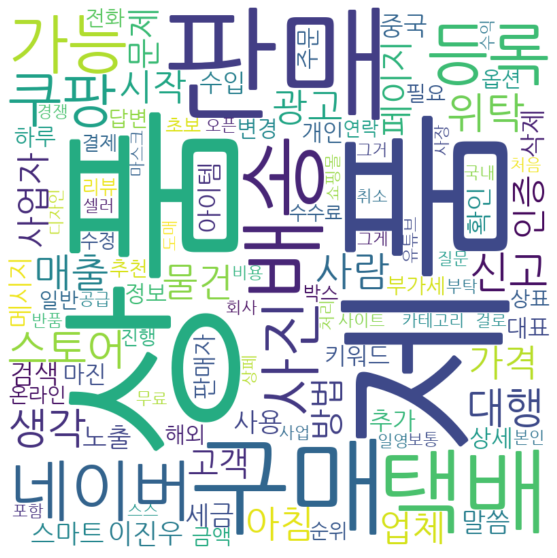

In [4]:
doc1_keycount,doc1_keyword = run(doc1)

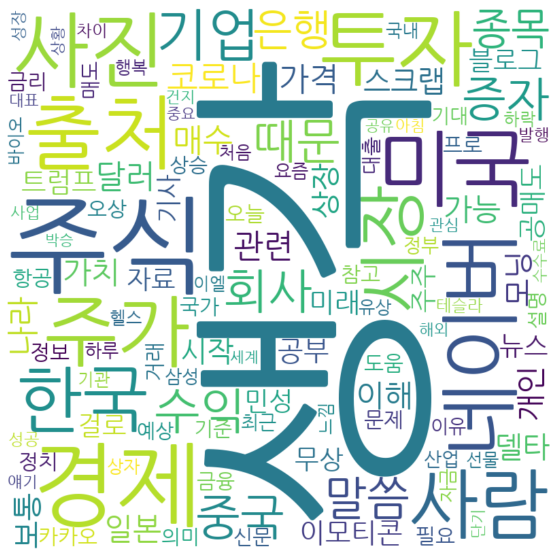

In [5]:
doc2_keycount,doc1_keyword = run(doc2)

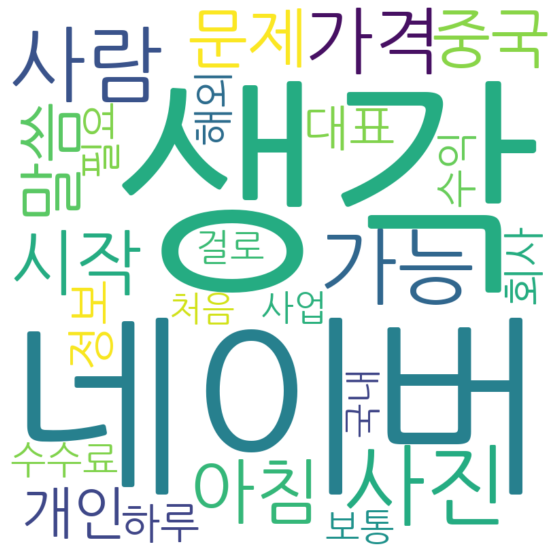

In [6]:
corr(doc1_keycount, doc2_keycount)